In [32]:
#Importações
import pandas as pd
import matplotlib.pyplot as plt

# Termodinâmica avançada

## Introdução

Esse trabalho será realizado durante a disciplina de termodinâmica avançada da Ilum escola de Ciência. O problema proposto é entender e estudar conceitos de potenciais termodinâmicos e interações moleculares a partir do estudo do Ciclo de Rankine. O ciclo Rankine é um processo termodinâmico que é a base de usinas a vapor que geram energia elétrica. Esse ciclo é constituído das seguintes etapas: i) um fluído de alta pressão é bombeado para dentro do ciclo (ii) e entra em uma caldeira, onde calor é adicionado a pressão constante para o líquido comprimido. iii) o vapor atinge a turbina, onde se expande adiabaticamente, esfria e acaba na pressão baixa original. (iv) Finalmente, o fluido parcialmente condensado é resfriado ainda mais em um condensador (Schroeder, 2000)(Miller, 2011).

Além disso, como observável no diagrama abaixo, outras fases anteriores e posteriores ao ciclo de Rankine também serão estudados. 

![Diagrama representativo](imagem/diagrama.png)
<center><b>Imagem 1</b> - Esquema que representa o trabalho a ser desenvolvido ao longo do semestre</center>


## Primeiro desafio

O primeiro desafio proposto é a escolha de uma mistura com potencial para fornecimento de energia ao ciclo Rankine (responsável pela geração de energia elétrica). A mistura escolhida pela dupla foi o Pentano(C<sub>5</sub>H<sub>12</sub>) e o Benzeno(C<sub>6</sub>H<sub>6</sub>).

Para escolher a mistura adequada, foram considerados quatro critérios principais. O primeiro critério foi a entalpia, que mede a energia térmica envolvida na mistura. A entalpia que iremos utilizar para determinar a mistura é a entalpia de combustão, isso porque no processo descrito na imagem 1, no desafio 3 terá a queima da mistura para aquecer o boiler, logo precisaremos da energia gerada por esse processo. A entalpia de combustão é um valor utilizado para medir a energia total liberada em forma de calor quando a substâncias sofre combustão completa em presença de oxigênio em condições padrão. De acordo com o webbook o [benzeno](https://webbook.nist.gov/cgi/inchi?ID=C71432&Mask=2) possue entalpia de combustão de $-3267 \pm 20$, e o [pentano](https://webbook.nist.gov/cgi/cbook.cgi?ID=C109660&Mask=1) de $-3535.4 \pm  0.96$.

O segundo critério foi a disponibilidade de um diagrama de fases para a mistura, que nos dá a relação entre as fases de uma substância em várias temperaturas e pressões (McQuaire e Simon, 1957) . Esse diagrama será essencial nas próximas etapas do trabalho. Como não haverá experimentos para coletar os dados, é necessário ter um diagrama de fases pronto para viabilizar os estudos. O diagra está mostrado na Imagem 2.

  ![Diagrama de fase.](imagem/diagrama_fases.png)
  
<center> <b>Imagem 2 </b> - Diagrama de fases da mistura. <b>Fonte:</b> Panfilov e Koldoba, 2016</center>

Seguindo a mesma linha, o terceiro critério foi a "popularidade" dos componentes da mistura. Optamos por utilizar benzeno e pentano, substâncias amplamente conhecidas e estudadas, cujas informações são facilmente acessíveis. Isso facilitará a obtenção dos dados necessários para o projeto, como a entalpia.

Por fim, o quarto critério foi o baixo ponto de vaporização dos elementos da mistura. O Ciclo Rankine funciona a partir da energia gerada pelo vapor, de modo que quanto menor a temperatura de vaporização, menor será a energia necessária para aquecer e vaporizar a mistura. Tanto o benzeno quanto o pentano apresentam pontos de vaporização relativamente baixos, o que os torna bons candidatos para aplicação no Ciclo Rankine. A temperatura de vaporização do benzeno é 80.1°C e do pentano é 36.1°C (quase em temperatura ambiente).


## Referências

[1] Schroeder, Daniel V. (2000). An introduction to thermal physics. San Francisco, CA: Addison Wesley. 

[2] MILLER, Bruce G. Clean Coal Technologies for Advanced Power Generation. In: MILLER, Bruce G. Clean Coal Engineering Technology. Butterworth-Heinemann, 2011. p. 251-300.

[2] Benzene. Disponível em: <https://webbook.nist.gov/cgi/inchi?ID=C71432&Mask=2>. Acesso em: 22 mar. 2023.

[3] Pentane. Disponível em: <https://webbook.nist.gov/cgi/cbook.cgi?ID=C109660&Mask=1>. Acesso em: 22 mar. 2023.

[4] McQuarrie, Donald A. (Donald Allan). Physical Chemistry : a Molecular Approach. Sausalito, Calif. University Science Books, 1997.

[5] PANFILOV, Mikhail; KOLDOBA, Alexandre. Kelvin’s Dissymmetric Models and Consistency Conditions of Multicomponent Gas-Liquid Equilibrium and Capillary Condensation. Journal of Thermodynamics, v. 2016, p. 1–21, 2016. Disponível em: <https://www.hindawi.com/journals/jther/2016/3806364/>. Acesso em: 22 mar. 2023. 


-------

## Segundo desafio


-------

Para seguirmos no ciclo de Rankine, temos o segundo desafio que nos dá as variáveis envolvidas nos processos termodinâmicos que fornecerão energia ao ciclo Rankine. O enfoque dessa atividade é analisar a separação dos líquidos na mistura e a evaporação do combustível, informações que serão essenciais para entender a entrada e ação do combustível no ciclo de fato.

Para iniciarmos nossos estudos, utilizamos dados teóricos [6] (http://www.vle-calc.com/phase_diagram.html) para plotar um diagrama de fases que forneça a temperatura pela molaridade da mistura, diferente do diagrama utilizado no desafio anterior. 

### Diagrama de fases Benzeno e Pentano

In [33]:
df_diagrama=pd.read_csv("dados_diagrama.txt")

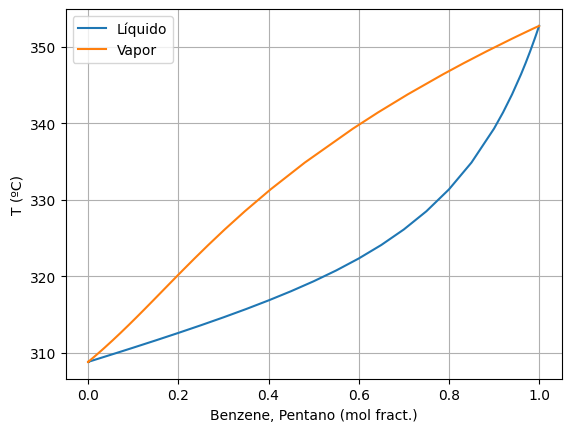

In [34]:
plt.plot(df_diagrama[" x1 "].values,df_diagrama["Temperature"].values,label='Líquido')
plt.plot(df_diagrama[" y1"].values,df_diagrama["Temperature"].values,label='Vapor')
plt.ylabel("T (ºC)")
plt.xlabel("Benzene, Pentano (mol fract.)")
plt.legend()
plt.grid()
plt.show()

A partir desse gráfico, conseguiremos realizar a separação da mistura que explicaremos a seguir.

------------

### Volume da mistura de líquidos
Nessa etapa, queremos descobrir qual será o volume total da mistura se considerarmos a massa como uma tonelada.
O volume final da mistura é dado por:
$$ V = v_{p1}  n_1 + v_{p2}  n_1$$

Podemos simpliicar essa equação se dividirmos tudo pelo número total molar, com isso teremos o volume em função de uma concentração de componentes $x_1$ para o componente 1 e $x_2$ para o componente 2.

Ficamos com a fórmula:

$$ V = \frac{x_1Mm}{d}+\frac{x_2Mm}{d}$$ 


sendo, $x_1$ a concentração do primeiro composto e $x_2$ a concentração do segundo composto, $Mm$ a massa molar e $d$ a densidade. O valor de $x_n$ é dado por $x_1 = \frac{n_1}{n_1+n_2}$ sendo o $n_1$ o número de mols do primeiro componente e $n_q + n_2$ o número total de mols do sistema. Utilizaremos o $x_1$ e $x_2$ como os valores arbitrários da porcentagem de massa de cada um dos componentes no sistema.

Não está disponível na literatura o valor da densidade da mistura, que é um valor experimental, por isso, vamos utilizar a densidade de cada um dos componentes. Os valores de densidade que encontramos para os compostos consideramos a temperatura no ponto de ebulição da cada componente, sendo o do pentano **309.2 K** e do benzeno **353.3 K**,  além disso, consideramos a pressão atmosferica, **0.1014 MPa**, dessa forma, nosso cálculo não precisa considerar o acréscimo de pressão [7], [8].

Dessa forma, a densidade de cada componente da mistura é:

In [35]:
densidade_pentano = 2.9736 #kg/m3 
densidade_benzeno = 2.7961 #kg/m3
massa_total = 1000 #kg

def densidade_da_mistura(densidade1, densidade2, massa_total, x1):
    """Calcula a densidade da mistura.
    Args:
        densidade1: densidade do pentano.
        densidade2: densidade do benzeno.
        massa_total: massa total da mistura.
        x1: fração molar da mistura.
    Return:
        densidade_da_mistura: densidade da mistura.
        """
    massa_pentano = massa_total * x1
    massa_benzeno = massa_total - massa_pentano
    
    densidade_da_mistura = (massa_pentano / (massa_total / densidade1)) + (massa_benzeno / (massa_total / densidade2))
    return densidade_da_mistura

In [42]:
densidade_mistura = densidade_da_mistura(densidade_pentano, densidade_benzeno, massa_total, 0.7)
print(densidade_mistura, "kg/m³")

2.92035 kg/m³


Agora, podemos encontrar o volume total a partir da fórmula acima:

In [43]:
x1 = 0.7  # % massa
x2 = 0.3  # % massa
Mm1 = 72.149  # g/mol
Mm2 = 78.112  # g/mol


def volume_total(x1, x2, Mm1, Mm2, densidade_da_mistura):
    volume_pentano = (x1 * Mm1) / densidade_da_mistura
    volume_benzeno = (x2 * Mm2) / densidade_da_mistura
    volume_total = volume_pentano + volume_benzeno

    return volume_pentano, volume_benzeno, volume_total


volume_pentano, volume_benzeno, valor_volume_total = volume_total(
    x1, x2, Mm1, Mm2, densidade_mistura
)
print(f"O valor do volume de pentano é {volume_pentano} m³/mol\n")
print(f"O valor do volume de benzeno é {volume_benzeno} m³/mol\n")
print(f"O valor do volume total é {valor_volume_total} m³/mol")

O valor do volume de pentano é 17.29392024928519 m³/mol

O valor do volume de benzeno é 8.024243669423186 m³/mol

O valor do volume total é 25.318163918708375 m³/mol


------------

### Determinação da separação da mistura.

Para realizar a separação da mistura de benzeno e do pentano utilizaremos da destilação em lote que consiste em esquentar a mistura em uma determinada temperatura, sendo assim o líquido mais volátil ira evaporar primeiro, que no nosso caso é o pentano, o elemento de interesse. Depois de evaporar e condensar essa fração, temos duas misturas com valores de concentração diferentes dos originais. Para uma solução pura do pentano, é preciso evaporar novamente até que sobre apenas o pentano.

### Pressão de vapor.

A pressão de vapor é a pressão exercida por um vapor em equilíbrio com o mesmo em sua fase líquida em uma determinada temperatura. Os gráficos abaixo representam a pressão de vapor de cada elemento da mistura com base na temperatura, o último gráfico é a plotagem dos dois juntos apenas para melhor visualização.

Esse dado é de estrema importância para a destilação em lotes, isso porque podemos analisar qual elemento da mistura ira evaporar antes, mais volátil. 

#### Pressão de vapor do benzeno

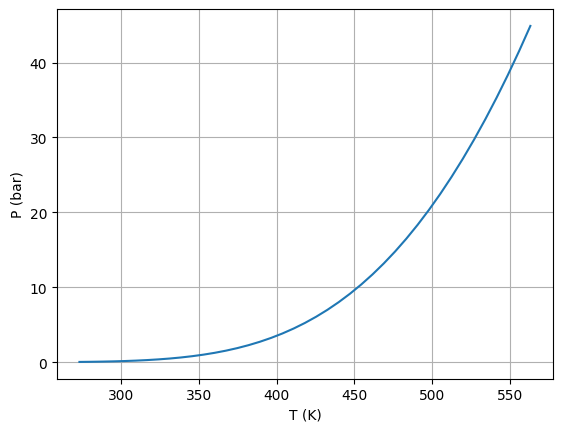

In [38]:
pressão_vapor_benzeno = pd.read_csv("pressão_vapor_benzeno.txt").drop(0,axis=0).astype('float')
pressão_vapor_benzeno.plot(x="Temperature",legend=False)
plt.ylabel("P (bar)")
plt.xlabel("T (K)")
plt.grid()
plt.show()

### Presão de vapor do pentano

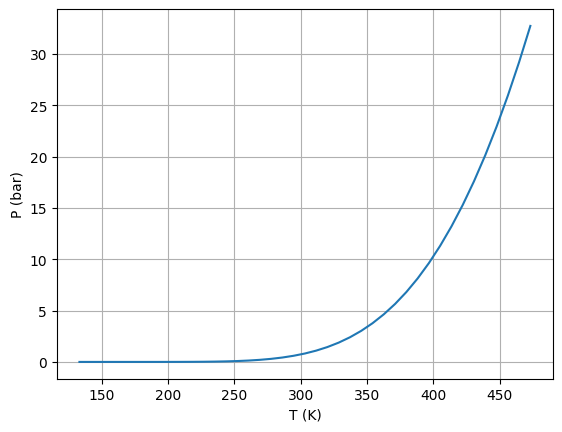

In [39]:
pressão_vapor_pentano = pd.read_csv("pressão_vapor_pentano.txt").drop(0,axis=0).astype('float')
pressão_vapor_pentano.plot(x="Temperature",legend=False)
plt.ylabel("P (bar)")
plt.xlabel("T (K)")
plt.grid()
plt.show()

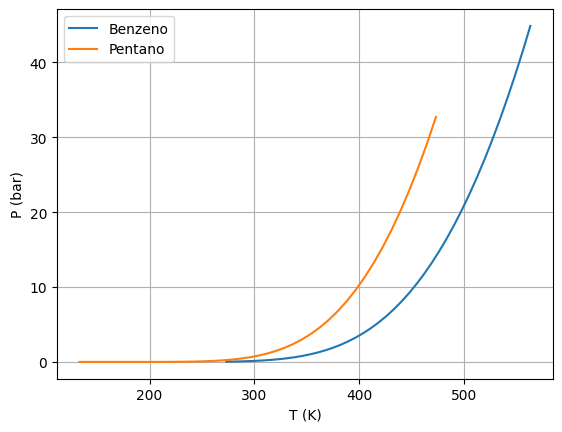

In [40]:
ax = pressão_vapor_benzeno.plot(x="Temperature")
pressão_vapor_pentano.plot(ax=ax,x="Temperature")
plt.legend(["Benzeno","Pentano"])
plt.ylabel("P (bar)")
plt.xlabel("T (K)")
plt.grid()
plt.show()

Com esses dados podemos realmente perceber que o pentano é mais volátil, assim facilitando a separação.

Dado este problema criamos um código que separa a mistura em qualquer concentração do benzeno, utilizando os dados do diagrama de fase da mistura.

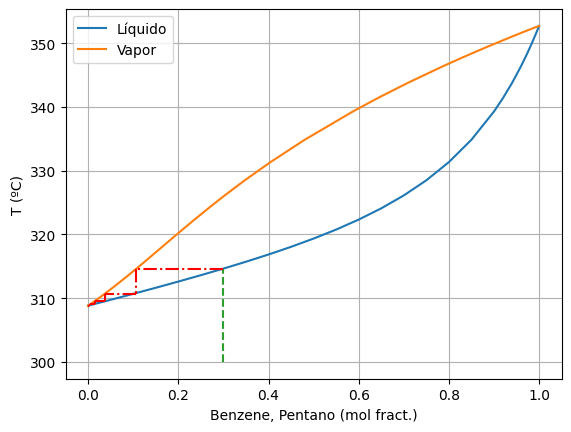

É nescessario fazer 7 destilações para ter uma concentração de menos ou igual a 0, começando com 0.3 de concentração.


,Temperatura,x1,x2
0,314.650,0.300000,0.700000
1,310.689,0.107056,0.892944
2,309.569,0.036464,0.963535
3,309.016,0.014807,0.985193
4,308.906,0.003734,0.996266
5,308.852,0.001497,0.998503
6,308.823,0.000374,0.999626
7,308.823,0.000000,1.000000


In [41]:
def achar_y(x):
    """Acha o valor do y mais perto a partir do valor de x do gráfico.
    Args: 
        x: valor do x do gráfico.
    Returns:
        y do gráfico."""
    linha = " x1 "

    lista_modificada = abs(df_diagrama[linha].values - x)
    index = list(lista_modificada).index(lista_modificada.min())
    return df_diagrama["Temperature"][index]


def achar_x(y):
    """Acha o valor do x mais perto a partir do valor de y do gráfico.
    Args: 
        y: valor do y do gráfico.
    Returns:
        y do gráfico."""
    linha = " y1"

    lista_modificada = abs(df_diagrama["Temperature"].values - y)
    index = list(lista_modificada).index(lista_modificada.min())
    return df_diagrama[linha][index]


def plot_batch_distillation(consentração, limite=100, salvar=False, erro=0.04):
    """Plota o esquema da destilação para a mistura, benzeno e pentano, em qualquer consentração molar do benzeno.
    Args:
        Consentração: Consentração molar do benzeno, em float.
        Limite: limite de destilações realizadas, por padão o maximo é 100.
        salvar: Salvar imagem do esquema da destilação, deixa a função mais lenta.
        erro: O valor minimo que a concentração do benzeno deve parar para parar as interções.
    Returns:
        vezes: quantas destilações precisa ser feitas.
        Tabela: Tabela com os dados das destilações."""
    plt.plot(
        df_diagrama[" x1 "].values, df_diagrama["Temperature"].values, label="Líquido"
    )
    plt.plot(
        df_diagrama[" y1"].values, df_diagrama["Temperature"].values, label="Vapor"
    )
    plt.ylabel("T (ºC)")
    plt.xlabel("Benzene, Pentano (mol fract.)")
    y1 = achar_y(consentração)
    plt.plot([consentração, consentração], [300, y1], "--")
    x1 = consentração
    vezes = 0
    Dados = [[], [], []]
    for _ in range(limite):
        Dados[0].append(y1)
        Dados[1].append(x1)
        Dados[2].append(1 - x1)
        x2 = achar_x(y1)
        plt.plot([x1, x2], [y1, y1], "r-.")  # horizontal
        y2 = achar_y(x2)
        plt.plot([x2, x2], [y1, y2], "r-.")  # vertical
        x1 = x2
        y1 = y2
        vezes += 1
        if x1 <= erro:
            break
    Dados[0].append(y1)
    Dados[1].append(x1)
    Dados[2].append(1 - x1)
    plt.legend()
    plt.grid()
    plt.savefig("imagem/destilação.png", dpi=1200) if salvar else None
    plt.show()
    tabela = pd.DataFrame({"Temperatura": Dados[0], "x1": Dados[1], "x2": Dados[2]})
    return vezes, tabela

conce = 0.3
erro = 0
vezes, tabela = plot_batch_distillation(conce, erro=erro)
print(
    f"É nescessario fazer {vezes} destilações para ter uma concentração de menos ou igual a {erro}, começando com {conce} de concentração."
)
tabela

A partir desses dados é possivel notar que com apenas 7 destilzações podemos separar o pentano, e assim ter o elemto puro no final da destilação.

----
### Conclusão
Nessa etapa do projeto, definimos o volume total da mistura e o de cada componente, a densidade total da mistura e a pressão de vapor do sistema e as condições de separação. A pressão de vapor será utilizada para entender quanto o contêiner terá que aguentar quando o pentano liquido evaporar e se tornar gás.

Primeiro, nos concentramos em determinar o volume da mistura, de 0,3 frac mol de benzeno, e dos compostos. Para isso, precisamos da densidade da mistura, mas, como não tínhamos como calcular a densidade dos elementos, calculamos a partir das densidades dos elementos, e chegamos no resultado de 2,92 kg/m³ para a densidade da mistura.

Depois de ter a densidade calculada, podemos, calculamos o volume total, obtendo 17,29 para o pentano, 8,02 para o benzeno e 25,31 para a mistura total, todos em m³/mol.

Após o cálculo do volume separamos a mistura utilizando a destilação em lotes, e com ela percebemos que precisamos realizar 7 destilações para ter o pentano puro.

Para calcular a destilação também utilizamos a pressão de vapor de cada elemento para descobrir o mais volátil, e já tendo esses dados iremos utilizá-los no próximo desafio para calcular se o tanque irá aguentar a pressão. 

-----

## Referências

[1] Schroeder, Daniel V. (2000). An introduction to thermal physics. San Francisco, CA: Addison Wesley. 

[2] MILLER, Bruce G. Clean Coal Technologies for Advanced Power Generation. In: MILLER, Bruce G. Clean Coal Engineering Technology. Butterworth-Heinemann, 2011. p. 251-300.

[2] Benzene. Disponível em: <https://webbook.nist.gov/cgi/inchi?ID=C71432&Mask=2>. Acesso em: 22 mar. 2023.

[3] Pentane. Disponível em: <https://webbook.nist.gov/cgi/cbook.cgi?ID=C109660&Mask=1>. Acesso em: 22 mar. 2023.

[4] McQuarrie, Donald A. (Donald Allan). Physical Chemistry : a Molecular Approach. Sausalito, Calif. University Science Books, 1997.

[5] PANFILOV, Mikhail; KOLDOBA, Alexandre. Kelvin’s Dissymmetric Models and Consistency Conditions of Multicomponent Gas-Liquid Equilibrium and Capillary Condensation. Journal of Thermodynamics, v. 2016, p. 1–21, 2016. Disponível em: <https://www.hindawi.com/journals/jther/2016/3806364/>. Acesso em: 22 mar. 2023. 

[6] Calculation of vapor-liquid equilibrium (VLE) and drawing of phase diagrams. Disponível em: <http://www.vle-calc.com/phase_diagram.html>. Acesso em: 19 de Abril, 2023.

[7] Isothermal Properties for Pentane. Disponível em: <https://webbook.nist.gov/cgi/fluid.cgi?T=309.2&PLow=&PHigh=&PInc=&Digits=5&ID=C109660&Action=Load&Type=IsoTherm&TUnit=K&PUnit=MPa&DUnit=mol%2Fl&HUnit=kJ%2Fmol&WUnit=m%2Fs&VisUnit=uPa*s&STUnit=N%2Fm&RefState=DEF>. Acesso em: 19 de Abril, 2023.

[8]Isothermal Properties for Benzene. Disponível em: <https://webbook.nist.gov/cgi/fluid.cgi?T=353.3&PLow=&PHigh=&PInc=&Digits=5&ID=C71432&Action=Load&Type=IsoTherm&TUnit=K&PUnit=MPa&DUnit=mol%2Fl&HUnit=kJ%2Fmol&WUnit=m%2Fs&VisUnit=uPa*s&STUnit=N%2Fm&RefState=DEF>. Acesso em: 19 de Abril, 2023.

[9] Pentane - Thermophysical Properties. Disponível em: <https://www.engineeringtoolbox.com/pentane-properties-d_2048.html> 

[10] Benzene - Thermophysical Properties. Disponível em: <https://www.engineeringtoolbox.com/benzene-benzol-properties-d_2053.html> Acesso em: 19 de Abril, 2023.